<a href="https://colab.research.google.com/github/anish2cod/NerualNetwork/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
class Functions:
  # defining relu and its derivative
  def Relu(self,x):
    if x > 0:
      return x
    else:
      return 0
  def Relu_diff(self,x):
    if x > 0:
      return 1
    elif x < 0:
      return 0
    else:
      return 1/2

  def Leaky_Relu(self,x):
    if x >= 0:
      return x
    elif x < 0:
      return .15*x

  def Leaky_Relu_Diff(self,x):
    if x > 0 :
      return 1
    elif x<0:
      return .15
    else:
      return .125

  def Sigmoid(self,x):
    return 1/(1+np.exp(x))

  def Sigmoid_Diff(self,x):
    return self.Sigmoid(x)*(1-self.Sigmoid(x))

  #defining the active
  def Activation(self,x,activation):
    if activation == "relu":
      return self.Relu(x)
    if activation == "leaky":
      return self.Leaky_Relu(x)
    if activation == "sigmoid":
      return self.Sigmoid(x)
    if activation is None:
      return x

  def Diff(self,x,activation):
    if activation == "relu":
      return self.Relu_diff(x)
    if activation == "leaky":
      return self.Leaky_Relu_Diff(x)
    if activation == "sigmoid":
      return self.Sigmoid_Diff(x)
    if activation is None:
      return 1

In [3]:
# class Functions:
#     Relu = lambda self, x: max(0, x)
#     Relu_diff = lambda self, x: 1 if x > 0 else (0.5 if x == 0 else 0)

#     Leaky_Relu = lambda self, x: x if x >= 0 else 0.15 * x
#     Leaky_Relu_Diff = lambda self, x: 1 if x > 0 else (0.125 if x == 0 else 0.15)

#     def Activation(self, x, activation):
#         activations = {
#             "relu": self.Relu,
#             "leaky": self.Leaky_Relu
#         }
#         return activations.get(activation, lambda x: None)(x)

#     def Diff(self, x, activation):
#         derivatives = {
#             "relu": self.Relu_diff,
#             "leaky": self.Leaky_Relu_Diff
#         }
#         return derivatives.get(activation, lambda x: None)(x)


In [4]:
class Layer(Functions):
  def __init__(self, number_of_neurons,input_size , activation=None,dropout=0,weight_init = None):

    self.neurons = None
    #random initilization need to be changed
    self.weights = np.random.normal(0,.5,size = (number_of_neurons , input_size))
    self.bias = np.random.normal(0,.5,size = number_of_neurons)
    #need to change
    self.activation = activation
    self.weight_init = weight_init
    self.dropout = dropout


  def FeedForward_L(self,input):
    #print('input ' + str(input.shape))
    #print('weights '+str(self.weights.shape))
    self.pre_activation = self.weights @ input.reshape(-1,1) + self.bias.reshape(-1,1)
    self.neurons = np.array([self.Activation(x,self.activation) for x in self.pre_activation.reshape(-1)])
    return self.neurons

  def BackPropagation_L(self,grad,input,regularizer):
    grad = grad * np.array([self.Diff(x,self.activation) for x in self.pre_activation]).reshape(-1)
    self.grad_bias = grad
    self.grad_weights = grad.reshape(-1,1) @ input.reshape(1,-1) + 2 * regularizer * self.weights
    #print("grad : ", grad.shape)
    #print("grad_weights : ", self.grad_weights.shape)
    grad = self.weights.T @ grad
    #print("grad_e : ", grad.shape)
    return grad


In [5]:
#to solve how to differentiate function using progamming otherwise mannually give the functions of derivatives

In [6]:
class Sequential:
  #stack the layers and their interactions
  def __init__(self,layers):
    self.layers = layers

  def FeedForward_S(self,input):
    for i, layer in enumerate(self.layers):
      #print('layer ' + str(i))
      input = layer.FeedForward_L(input)

  def BackPropagation_S(self,grad,input1,regularizer):
    for i in range(len(self.layers)-1,0,-1):
      grad = self.layers[i].BackPropagation_L(grad,self.layers[i-1].neurons,regularizer)
      #print('layer ' + str(i))

    self.layers[0].BackPropagation_L(grad,input1,regularizer)




In [7]:
from typing_extensions import Self
class Neural:
  #fit,predict,backpropagation,feedforward etc
  #softmax contains all info for cross entropy

  def __init__(self, seq,learning_rate = 0.001,regularizer = .01):
    self.Sequential = seq
    if type(learning_rate) != list:
      self.lr = list([learning_rate for _ in range(len(self.Sequential.layers))])
    else:
      self.lr = learning_rate
    self.regularizer = regularizer


  def SoftMax(self, Z):
    ls = np.array([np.exp(i) for i in Z])
    return ls/sum(ls)

  def Accuracy(self,x,y):
    count = 0
    size = x.shape[0]
    for row in range(size):
      model.Sequential.FeedForward_S(x[row])
      y_pred = np.argmax(SoftMax(self.Sequential.layers[-1].neurons))
      if y_pred == y[row]:
        count = count + 1
    return count/x

  def fit(self,X,y,batch_size = 32,iterations = 50):
    batches = int(np.ceil(len(X)/batch_size))
    distinct_labels = len(np.unique(y))
    input_size = X.shape[0]

    self.loss = []
    for itr in range(iterations):
      print("Epoch " + str(itr + 1),end = '    ')
      loss = 0
      accuracy = 0
      for batch in range(batches):
        weights_update = [np.zeros_like(layer.weights) for layer in self.Sequential.layers]
        bias_update = [np.zeros_like(layer.bias) for layer in self.Sequential.layers]
        for i in range(batch_size):
          row = i+batch*batch_size
          if row > input_size - 1:
            break
          self.Sequential.FeedForward_S(np.array(X[row]))
          ls = [0 for i in range(distinct_labels)]
          ls[y[row]] = 1
          ls = np.array(ls)
          softmax = self.SoftMax(self.Sequential.layers[-1].neurons)
          if np.argmax(softmax) == y[row]:
            accuracy += 1
          grad =  softmax - ls

          loss = loss - np.log(softmax[y[row]])
          self.Sequential.BackPropagation_S(grad,np.array(X[row]),self.regularizer)
          i = 0
          for layer in self.Sequential.layers:
            weights_update[i] = weights_update[i] - self.lr[i] * layer.grad_weights
            bias_update[i] = bias_update[i] - self.lr[i] * layer.grad_bias
            i += 1
        j = 0
        for layer in self.Sequential.layers:
          layer.weights = layer.weights + weights_update[j]/batch_size
          layer.bias = layer.bias + bias_update[j]/batch_size
          j += 1
      weights_loss = 0
      for layer in self.Sequential.layers:
        weights_loss = weights_loss + 2 * self.regularizer * np.sum(layer.weights**2)
      loss = loss / input_size +  weights_loss
      accuracy /= input_size
      self.loss.append(loss)
      print('loss ' + str (loss),end = '  ')
      print('Accuracy : ' , accuracy)
      if (abs(loss) < 0.001):
        break

  def predict(self, X):
    y_pred = []
    size = X.shape[0]
    for row in range(size):
      self.Sequential.FeedForward_S(X[row])
      y_pred.append( np.argmax(self.SoftMax(self.Sequential.layers[-1].neurons)) )
    return y_pred


In [8]:
from keras.src.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
train_size = x_train.shape[0]
x_train = x_train.reshape(train_size,-1)
test_size = x_test.shape[0]
x_test = x_test.reshape(test_size,-1)

In [10]:


# Standardize the data
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)

In [11]:
len(x_test[1:3])

2

In [15]:
model = Neural(Sequential([Layer(50,x_train[1].shape[0],"leaky"),Layer(25,50,"leaky"),Layer(10,25)]),0.1,0)
model.fit(x_train,y_train,24,25)

Epoch 1    loss 0.7857045299056893  Accuracy :  0.8403666666666667
Epoch 2    loss 0.3091436208849195  Accuracy :  0.911
Epoch 3    loss 0.25096149429832276  Accuracy :  0.9271833333333334
Epoch 4    loss 0.21939526982023017  Accuracy :  0.9355166666666667
Epoch 5    loss 0.19673735764060368  Accuracy :  0.9419333333333333
Epoch 6    loss 0.18102904753713905  Accuracy :  0.9465166666666667
Epoch 7    loss 0.16725721205424296  Accuracy :  0.9504
Epoch 8    loss 0.1564630214365667  Accuracy :  0.9535666666666667
Epoch 9    loss 0.14750203385191055  Accuracy :  0.9562
Epoch 10    loss 0.13916520707741775  Accuracy :  0.9582666666666667
Epoch 11    loss 0.13300717556268332  Accuracy :  0.96055
Epoch 12    loss 0.12484941354416984  Accuracy :  0.9624
Epoch 13    loss 0.12079101357797485  Accuracy :  0.96325
Epoch 14    loss 0.11465898287638616  Accuracy :  0.9654166666666667
Epoch 15    loss 0.10932586415919661  Accuracy :  0.9667166666666667
Epoch 16    loss 0.10849022153488205  Accuracy :

In [ ]:
#avoid using softmax and use only cross entropy for training to avoid overflow
#analyse the factors influencing the gradients of each weights
#the see how different activation functions influence the gradient

In [14]:
weights = []
bias = []
for layer in model.Sequential.layers:
  weights.append(layer.weights)
  bias.append(layer.bias)

In [43]:
i = 0
for layer in model.Sequential.layers:
  layer.weights = weights[i]
  layer.bias = bias[i]
  i += 1

In [35]:
y_pred = model.predict(x_test)

In [19]:
def Accuracy(y,y_pred):
  count = 0
  for i in range(len(y)):
    if y[i] == y_pred[i]:
      count += 1
  return count / len(y)

In [20]:
Accuracy(y_test, model.predict(x_test))

0.9562

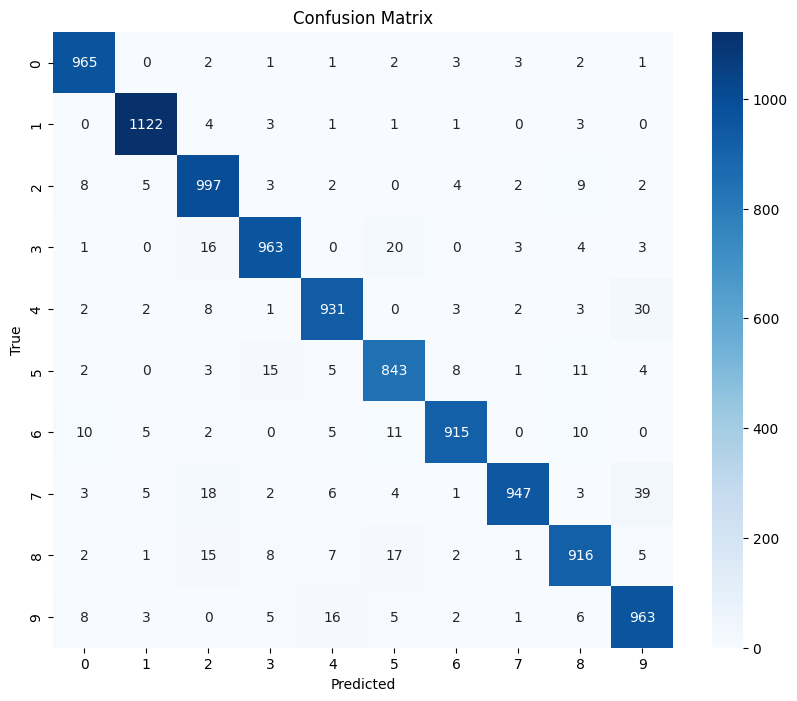

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,  model.predict(x_test))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

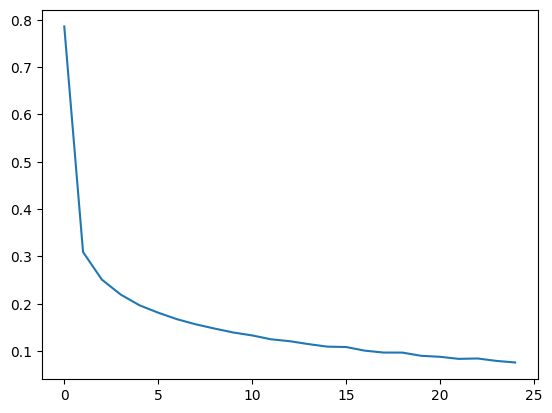

In [21]:
plt.plot(model.loss)

In [ ]:
count = 0
y_pred = []
for row in range(x_train.shape[0]):
  model.Sequential.FeedForward_S(x_train[row])
  y_pred.append(np.argmax(SoftMax(model.Sequential.layers[-1].neurons)))
  if y_pred[row] == y_train[row]:
    count = count + 1

In [ ]:
np.median(y_pred)

In [ ]:
count

In [ ]:
model.loss

In [ ]:
def Sigmoid(x):
  return 1/(1+np.exp(x))

def Sigmoid_Diff(x):
  return Sigmoid(x)*(1-Sigmoid(x))

np.array([Sigmoid_Diff(x) for x in model.Sequential.layers[0].pre_activation]).reshape(-1).shape

In [ ]:
def SoftMax( Z):
  ls = np.array([np.exp(i) for i in Z])
  return ls/sum(ls)
model.Sequential.FeedForward_S(x_test[3])
SoftMax(model.Sequential.layers[-1].pre_activation)

In [ ]:
np.random.uniform(-1,1,(2,3))

In [ ]:
model.Sequential.layers[-1].weights

In [ ]:
model.Sequential.layers[2].weights.max()

In [ ]:
x_test.shape